A Matriz de Saldos Contábeis é um projeto da Secretaria do Tesouro Nacional.
Primeiramente começaram a coletar informações na forma de pilotos, e hoje o projeto encontra-se em produção (início em 2017).
Os dados coletados são transmitidos pelos Estados e Municípios, e já geram automaticamente as informações do RREO e RGF, de publicação bimestral e quadrimestral.
A periodicidade de transmissão é mensal.
Acessar esses dados para pesquisas, e para fazer análises para disponibilização na internet pode ser uma ótima iniciativa.
 
Site com a documentação de envio dos dados da MSC:
https://siconfi.tesouro.gov.br/siconfi/pages/public/conteudo/conteudo.jsf?id=12503
 
Site para consulta aos dados da MSC:
https://www.tesourotransparente.gov.br/consultas/consultas-siconfi/siconfi-api-de-dados-abertos
 
Se conseguirmos acessar, podemos pensar em análises diferentes das que já estão disponíveis.
Exemplo: Rigidez orçamentária
 
Abraços,

In [1]:
import pandas as pd
import requests

In [2]:
payload = {
    "an_exercicio": 2018,
    "nr_periodo": 1,
    "co_tipo_demonstrativo": "RREO Simplificado",
#     "id_ente": 1718659
    "id_ente": 1100015
}

In [3]:
base_url = 'http://apidatalake.tesouro.gov.br/ords/siconfi/tt'

In [4]:
r = requests.get('http://apidatalake.tesouro.gov.br/ords/siconfi/tt/rreo',
                 params=payload)

In [5]:
r.status_code == requests.codes.ok

True

In [6]:
r.json()

{'items': [{'exercicio': 2018,
   'demonstrativo': 'RREO Simplificado',
   'periodo': 1,
   'periodicidade': 'B',
   'instituicao': "Prefeitura Municipal de Alta Floresta D'Oeste - RO",
   'cod_ibge': 1100015,
   'uf': 'RO',
   'populacao': 25506,
   'anexo': 'RREO-Anexo 01',
   'rotulo': 'Padrão',
   'coluna': 'PREVISÃO INICIAL',
   'cod_conta': 'ReceitasExcetoIntraOrcamentarias',
   'conta': 'RECEITAS (EXCETO INTRA-ORÇAMENTÁRIAS) (I)',
   'valor': 54609265.47},
  {'exercicio': 2018,
   'demonstrativo': 'RREO Simplificado',
   'periodo': 1,
   'periodicidade': 'B',
   'instituicao': "Prefeitura Municipal de Alta Floresta D'Oeste - RO",
   'cod_ibge': 1100015,
   'uf': 'RO',
   'populacao': 25506,
   'anexo': 'RREO-Anexo 01',
   'rotulo': 'Padrão',
   'coluna': 'PREVISÃO ATUALIZADA (a)',
   'cod_conta': 'ReceitasExcetoIntraOrcamentarias',
   'conta': 'RECEITAS (EXCETO INTRA-ORÇAMENTÁRIAS) (I)',
   'valor': 54609265.47},
  {'exercicio': 2018,
   'demonstrativo': 'RREO Simplificado',
   

In [8]:
df_rreo = pd.DataFrame(r.json()['items'])
df_rreo.sample(5)

,exercicio,demonstrativo,periodo,periodicidade,instituicao,cod_ibge,uf,populacao,anexo,rotulo,coluna,cod_conta,conta,valor
170,2018,RREO Simplificado,1,B,Prefeitura Municipal de Alta Floresta D'Oeste ...,1100015,RO,25506,RREO-Anexo 01,Padrão,DESPESAS EMPENHADAS NO BIMESTRE,DespesasCorrentes,DESPESAS CORRENTES,9691432.90
312,2018,RREO Simplificado,1,B,Prefeitura Municipal de Alta Floresta D'Oeste ...,1100015,RO,25506,RREO-Anexo 02,Total das Despesas Exceto Intra-Orçamentárias,DOTAÇÃO ATUALIZADA (a),RREO2TotalDespesas,Saneamento,179621.38
195,2018,RREO Simplificado,1,B,Prefeitura Municipal de Alta Floresta D'Oeste ...,1100015,RO,25506,RREO-Anexo 01,Padrão,DOTAÇÃO INICIAL (d),DespesasDeCapital,DESPESAS DE CAPITAL,1597915.33
507,2018,RREO Simplificado,1,B,Prefeitura Municipal de Alta Floresta D'Oeste ...,1100015,RO,25506,RREO-Anexo 02,Total das Despesas Exceto Intra-Orçamentárias,SALDO (e) = (a-d),RREO2TotalDespesas,Legislativa,2386299.49
512,2018,RREO Simplificado,1,B,Prefeitura Municipal de Alta Floresta D'Oeste ...,1100015,RO,25506,RREO-Anexo 02,Total das Despesas Exceto Intra-Orçamentárias,SALDO (e) = (a-d),RREO2TotalDespesas,Assistência Social,1011624.69


In [11]:
from tqdm import tqdm
import time

# de jan/2017 a dez/2019

In [12]:
lista_anos = [2017,2018,2019]

In [13]:
dados = []
for ano in lista_anos:
    for periodo in tqdm(range(1,7)):
        payload['an_exercicio'] = ano
        payload['nr_periodo'] = periodo
        
        r = requests.get(
            'http://apidatalake.tesouro.gov.br/ords/siconfi/tt/rreo',
            params=payload
        )
        
        dados.extend(r.json()['items'])
        
#         time.sleep(1)
        
df1 = pd.DataFrame(dados)

100%|██████████| 6/6 [00:09<00:00,  1.63s/it]


In [15]:
df1.sample(5)

,exercicio,demonstrativo,periodo,periodicidade,instituicao,cod_ibge,uf,populacao,anexo,rotulo,coluna,cod_conta,conta,valor
12383,2019,RREO Simplificado,6,B,Prefeitura Municipal de Alta Floresta D'Oeste ...,1100015,RO,23167,RREO-Anexo 02,Total das Despesas Exceto Intra-Orçamentárias,DESPESAS LIQUIDADAS NO BIMESTRE,RREO2TotalDespesas,Desporto Comunitário,222774.78
848,2017,RREO Simplificado,2,B,Prefeitura Municipal de Alta Floresta D'Oeste ...,1100015,RO,25506,RREO-Anexo 02,None,% (b/total b),RREO2TotalDespesas,Vigilância Sanitária,0.28
12350,2019,RREO Simplificado,6,B,Prefeitura Municipal de Alta Floresta D'Oeste ...,1100015,RO,23167,RREO-Anexo 02,Total das Despesas Exceto Intra-Orçamentárias,SALDO (c) = (a-b),RREO2TotalDespesas,Educação,802155.37
1963,2017,RREO Simplificado,3,B,Prefeitura Municipal de Alta Floresta D'Oeste ...,1100015,RO,25506,RREO-Anexo 06,None,DESPESAS EMPENHADAS ATÉ O BIMESTRE / 2017,RREO6PessoalEEncargosSociais,Pessoal e Encargos Sociais,15023296.07
8725,2018,RREO Simplificado,6,B,Prefeitura Municipal de Alta Floresta D'Oeste ...,1100015,RO,25506,RREO-Anexo 07,Padrão,Liquidados (h),RestosAPagarNaoProcessadosLiquidados,TOTAL (III) = (I + II),4331147.47


In [16]:
df1['exercicio'].unique()

array([2017, 2018, 2019])

## número de itens por período

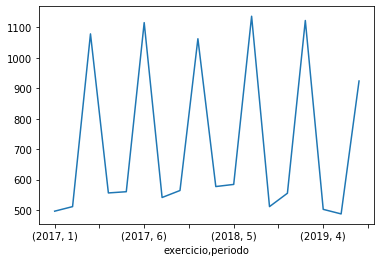

In [17]:
df1.groupby(['exercicio','periodo']).count().iloc[:,0].plot()

## soma dos valores por periodo

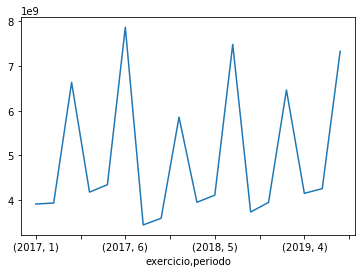

In [18]:
df1.groupby(['exercicio','periodo']).sum()['valor'].plot()

# de Entes do IBGE

In [19]:
mylist = [3548500,
3548609,
3548609,
3548708,
3548708,
3548807,
3548807,
3548906,
3548906,
3549003,
3549003,
3549102,
3549102,
3549201,
3549201,
3549250,
3549250,
3549300,
3549300,
3549409,
3549409,
3549508,
3549508,
3549607,
3549607,
3549706,
3549706,
3549805,
3549805,
3549904,
3549904,
3549953,
3549953,
3550001,
3550001,
3550100,
3550100,
3550209,
3550209,
3550308,
3550308,
3550407,
3550407,
3550506,
3550506]
mylist = list(dict.fromkeys(mylist))
mylist

[3548500,
 3548609,
 3548708,
 3548807,
 3548906,
 3549003,
 3549102,
 3549201,
 3549250,
 3549300,
 3549409,
 3549508,
 3549607,
 3549706,
 3549805,
 3549904,
 3549953,
 3550001,
 3550100,
 3550209,
 3550308,
 3550407,
 3550506]

In [20]:
lista_cod = [3548500,
 3548609,
 3548708,
 3548807,
 3548906,
 3549003,
 3549102,
 3549201,
 3549250,
 3549300,
 3549409,
 3549508,
 3549607,
 3549706,
 3549805,
 3549904,
 3549953,
 3550001,
 3550100,
 3550209,
 3550308,
 3550407,
 3550506]

In [21]:
payload = {
    "an_exercicio": 2018,
    "nr_periodo": 6,
    "co_tipo_demonstrativo": "RREO Simplificado"
}

In [22]:
dados = []
for cod in lista_cod:
    payload["id_ente"] = cod

    r = requests.get(
        'http://apidatalake.tesouro.gov.br/ords/siconfi/tt/rreo',
        params=payload
    )
    
    print(r.json()['count'])

    dados.extend(r.json()['items'])

#     time.sleep(1)
        
df2 = pd.DataFrame(dados)

0
0
0
0
0
1705
0
1650
1577
0
0
0
0
0
0
0
0
1129
0
0
0
1632
0


## número de itens por ente

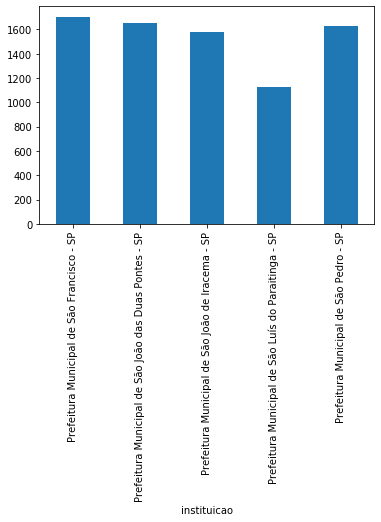

In [81]:
df2.groupby('instituicao').count().iloc[:,0].plot.bar()

## soma dos valores por ente

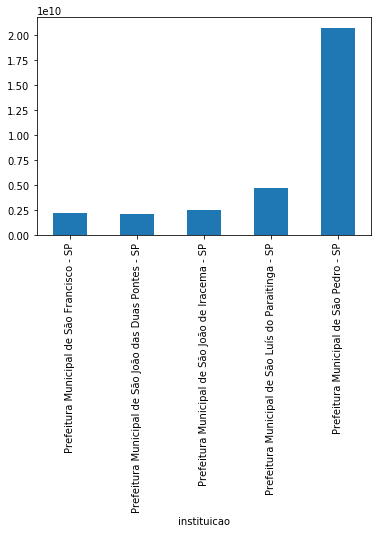

In [82]:
df2.groupby('instituicao').sum()['valor'].plot.bar()